In [11]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [12]:
bb = pd.read_csv('pitching.csv')

In [13]:
bb.drop(columns=['Unnamed: 0', '#P', 'GS', 'GF', 'R', 'ER', 'H9', 'HR9', 'BB9', 'SO9', 'IBB', 'BK', 'WP',], axis=1, inplace=True)

In [14]:
bb.drop(columns=['PAge', 'RA/G', 'W', 'L', 'LOB', 'CG', 'tSho', 'cSho', 'SV'], axis=1, inplace=True)
bb['oOBP'] = round((bb.H + bb.BB + bb.HBP) / bb.BF, 3)
bb

,Tm,W-L%,ERA,G,IP,H,HR,BB,SO,HBP,BF,ERA+,FIP,WHIP,SO/W,YR,oOBP
0,Atlanta Braves,0.469,4.33,162,1430.2,1451,185,478,960,30,6179,98,4.04,1.348,2.01,0,0.317
1,Baltimore Orioles,0.667,3.15,162,1478.2,1317,139,469,941,23,6099,116,3.59,1.208,2.01,0,0.297
2,Boston Red Sox,0.537,3.87,162,1446.1,1391,156,594,1003,44,6258,103,3.98,1.372,1.69,0,0.324
3,California Angels,0.531,3.48,162,1462.1,1280,154,559,922,43,6100,104,3.98,1.258,1.65,0,0.309
4,Chicago Cubs,0.519,3.76,162,1435.0,1402,143,475,1000,25,6086,119,3.59,1.308,2.11,0,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,St. Louis Cardinals,0.556,3.98,162,1417.0,1234,152,608,1225,85,6046,98,4.30,1.300,2.01,51,0.319
1440,Tampa Bay Rays,0.617,3.67,162,1455.2,1264,184,436,1478,55,5998,108,3.79,1.168,3.39,51,0.293
1441,Texas Rangers,0.370,4.79,162,1424.1,1402,232,513,1239,61,6103,92,4.76,1.344,2.42,51,0.324
1442,Toronto Blue Jays,0.562,3.91,162,1405.1,1257,209,473,1468,75,5916,115,4.18,1.231,3.10,51,0.305


In [15]:
oldnames = ['Tm', 'W-L%', 'ERA', 'G', 'IP', 'H', 'HR', 'BB', 'SO', 'FIP',
       'WHIP', 'YR', 'HBP', 'BF', 'SO/W', 'oOBP']
newnames = ['team', 'win_pct', 'era', 'games', 'innings', 'hits', 'homeruns', 'walks', 
            'strikeouts', 'fip', 'whip', 'year', 'hbp', 'batters_faced', 'kw_ratio', 'on_base_pct']

col_names = {i:j for i, j in zip(oldnames, newnames)}

bb.rename(columns=col_names, inplace=True)




In [16]:
bb.drop(['ERA+'], axis=1, inplace=True)
bb

,team,win_pct,era,games,innings,hits,homeruns,walks,strikeouts,hbp,batters_faced,fip,whip,kw_ratio,year,on_base_pct
0,Atlanta Braves,0.469,4.33,162,1430.2,1451,185,478,960,30,6179,4.04,1.348,2.01,0,0.317
1,Baltimore Orioles,0.667,3.15,162,1478.2,1317,139,469,941,23,6099,3.59,1.208,2.01,0,0.297
2,Boston Red Sox,0.537,3.87,162,1446.1,1391,156,594,1003,44,6258,3.98,1.372,1.69,0,0.324
3,California Angels,0.531,3.48,162,1462.1,1280,154,559,922,43,6100,3.98,1.258,1.65,0,0.309
4,Chicago Cubs,0.519,3.76,162,1435.0,1402,143,475,1000,25,6086,3.59,1.308,2.11,0,0.313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,St. Louis Cardinals,0.556,3.98,162,1417.0,1234,152,608,1225,85,6046,4.30,1.300,2.01,51,0.319
1440,Tampa Bay Rays,0.617,3.67,162,1455.2,1264,184,436,1478,55,5998,3.79,1.168,3.39,51,0.293
1441,Texas Rangers,0.370,4.79,162,1424.1,1402,232,513,1239,61,6103,4.76,1.344,2.42,51,0.324
1442,Toronto Blue Jays,0.562,3.91,162,1405.1,1257,209,473,1468,75,5916,4.18,1.231,3.10,51,0.305


In [17]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           1444 non-null   object 
 1   win_pct        1444 non-null   float64
 2   era            1444 non-null   float64
 3   games          1444 non-null   int64  
 4   innings        1444 non-null   float64
 5   hits           1444 non-null   int64  
 6   homeruns       1444 non-null   int64  
 7   walks          1444 non-null   int64  
 8   strikeouts     1444 non-null   int64  
 9   hbp            1444 non-null   int64  
 10  batters_faced  1444 non-null   int64  
 11  fip            1444 non-null   float64
 12  whip           1444 non-null   float64
 13  kw_ratio       1444 non-null   float64
 14  year           1444 non-null   int64  
 15  on_base_pct    1444 non-null   float64
dtypes: float64(7), int64(8), object(1)
memory usage: 180.6+ KB


In [18]:
bb.to_csv('clean_pitching.csv')

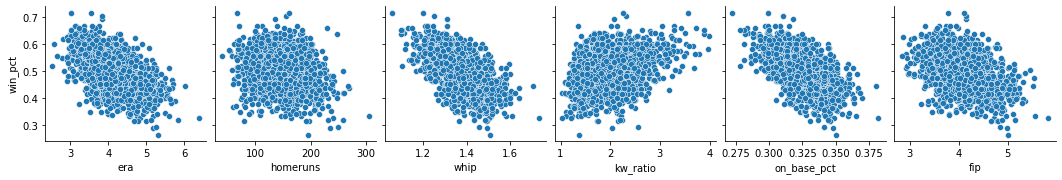

In [19]:
import seaborn as sns

target_pairs = sns.pairplot(data=bb, x_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'], y_vars=['win_pct'])

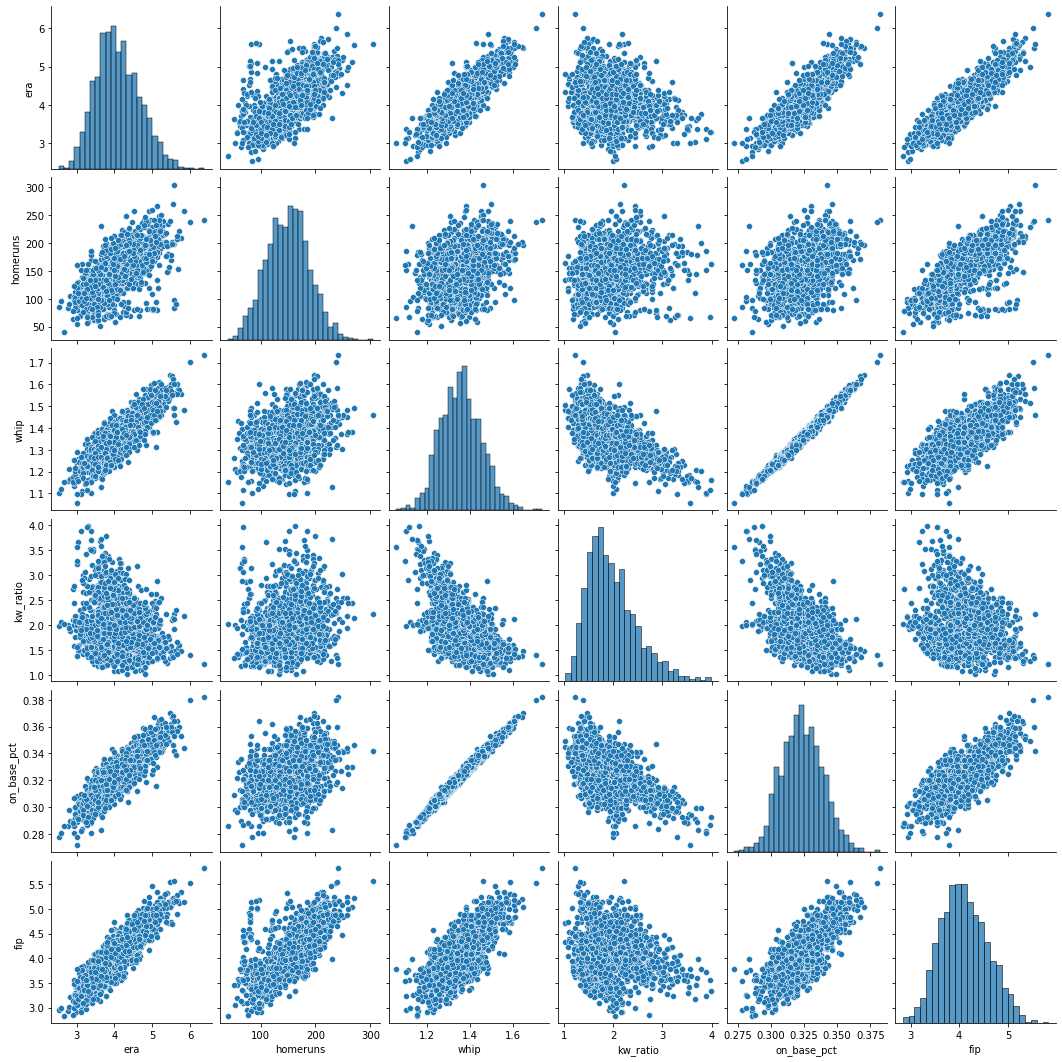

In [20]:
feature_pairs = sns.pairplot(data=bb, x_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'], y_vars=['era', 'homeruns', 'whip', 'kw_ratio', 'on_base_pct', 'fip'])

In [ ]:
import patsy

y, X = patsy.dmatrices('win_pct ~ era + whip + kw_ratio + fip', data=bb, return_type="dataframe")

basic_model = sm.OLS(y, X)
b_fit = basic_model.fit()
print(b_fit.summary())